In [1]:
from google.colab import files
src = list(files.upload().values())

Saving data_generation.py to data_generation.py
Saving plot_utils.py to plot_utils.py
Saving work_with_files.py to work_with_files.py
Saving basic_units.py to basic_units.py
Saving utils.py to utils.py


In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from typing import Tuple, MutableSequence
from collections.abc import Callable
import random
import math
from basic_units import radians
from utils import calc_time_between_transitions, mark_bifurcation_points
from plot_utils import get_rad_ticks, set_up_plot
from data_generation import generate_noise, get_samples
from work_with_files import generate_data, read_series_from_file
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multioutput import RegressorChain
from tensorflow.keras.layers import Dense, LSTM, Input, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from matplotlib.ticker import MaxNLocator


# Generate data

## Common settings

In [ ]:
series_len = 5000
random.seed(0)

## Without noise

### Graphs of the function and derivative

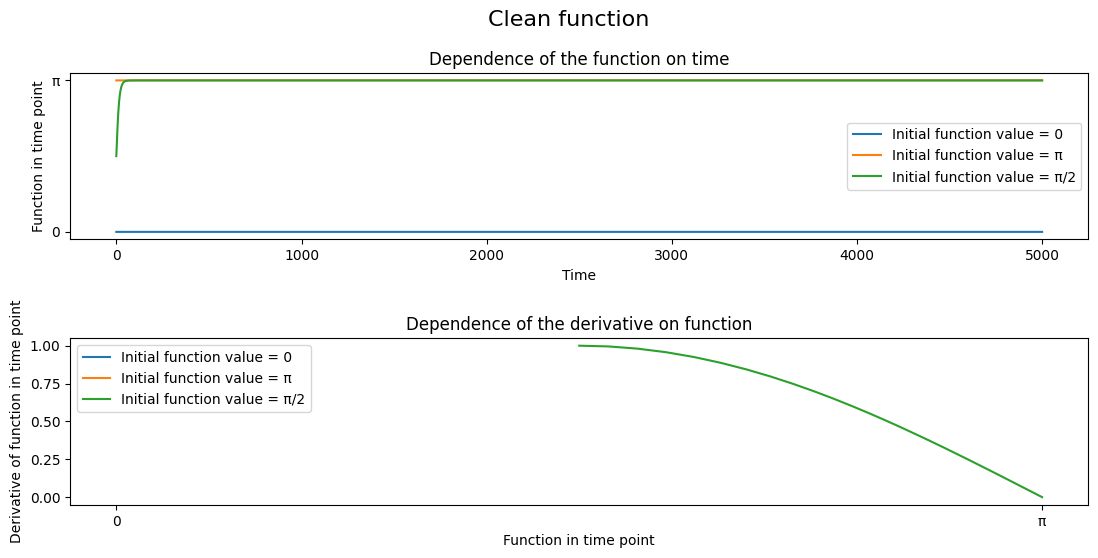

In [ ]:
x_ts_0, d_ts_0 = get_samples(x_t_init = 0)
x_ts_pi, d_ts_pi = get_samples(x_t_init = math.pi)
x_ts_half_pi, d_ts_half_pi = get_samples(x_t_init = math.pi/2)

ax1, ax2 = set_up_plot('Clean function')

ax1.plot(x_ts_0, label='Initial function value = 0')
ax1.plot(x_ts_pi, label='Initial function value = π')
ax1.plot(x_ts_half_pi, label='Initial function value = π/2')
ax1.legend()

ax2.plot(x_ts_0, d_ts_0, label='Initial function value = 0')
ax2.plot(x_ts_pi, d_ts_pi, label='Initial function value = π')
ax2.plot(x_ts_half_pi, d_ts_half_pi, label='Initial function value = π/2')
ax2.legend()

### Distribution of transition points on delta t

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

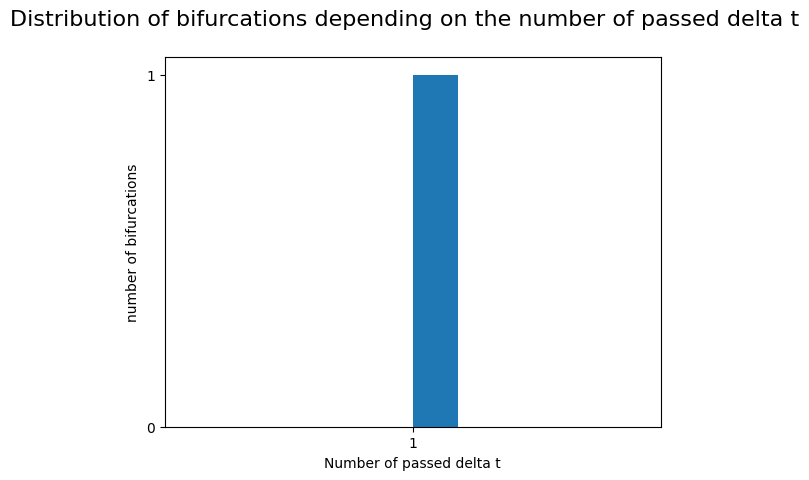

In [ ]:
marked_data = calc_time_between_transitions(x_ts_half_pi)
fig, ax = plt.subplots(1, 1)
fig.suptitle('Distribution of bifurcations depending on the number of passed delta t', fontsize=16)
ax.set_xlabel('Number of passed delta t')
ax.set_ylabel('number of bifurcations')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_locator(MaxNLocator(integer=True, min_n_ticks=1))
ax.hist(marked_data)

## White noise

### Graphs of the function and derivative

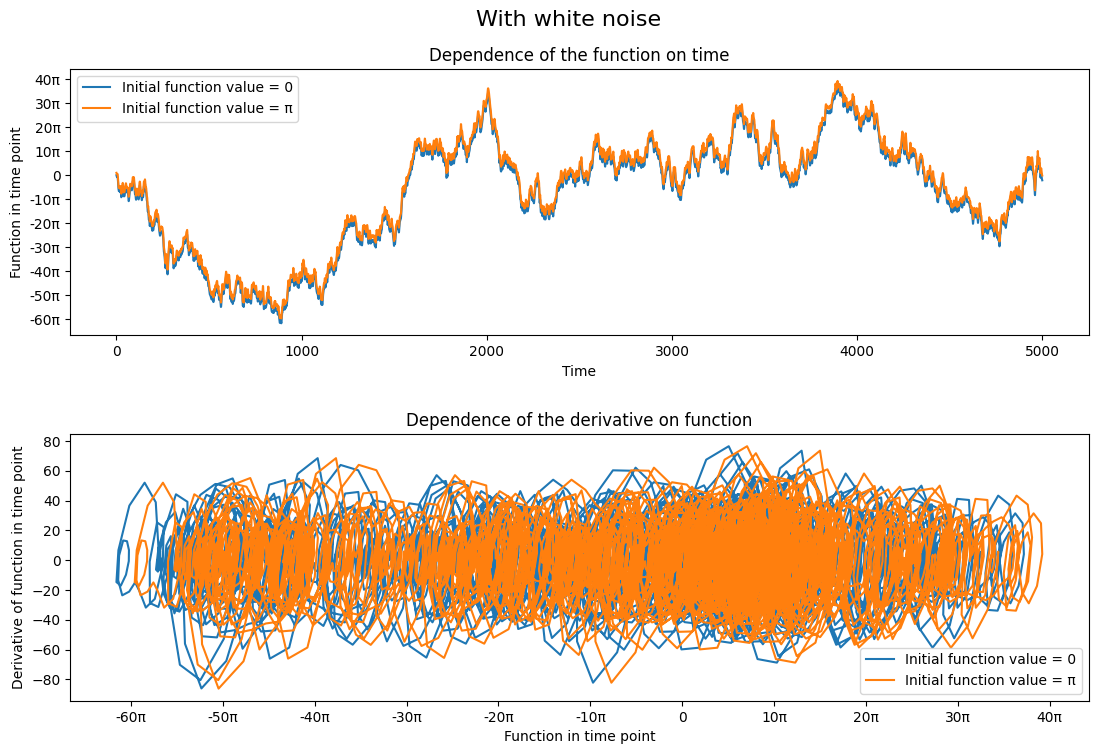

In [ ]:
white_noise = generate_noise()
x_ts_0, d_ts_0 = get_samples(x_t_init = 0, noise=white_noise)
x_ts_pi, d_ts_pi = get_samples(x_t_init = math.pi, noise=white_noise)

ax1, ax2 = set_up_plot('With white noise', figsize=(12, 8), ticks_range=(-140, 120, 10))

ax1.plot(x_ts_0, label='Initial function value = 0')
ax1.plot(x_ts_pi, label='Initial function value = π')
ax1.legend()

ax2.plot(x_ts_0, d_ts_0, label='Initial function value = 0')
ax2.plot(x_ts_pi, d_ts_pi, label='Initial function value = π')
ax2.legend()

### Distribution of transition points on delta t

(array([2.015e+03, 2.730e+02, 1.550e+02, 8.300e+01, 3.800e+01, 1.500e+01,
        1.200e+01, 8.000e+00, 4.000e+00, 1.000e+00]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

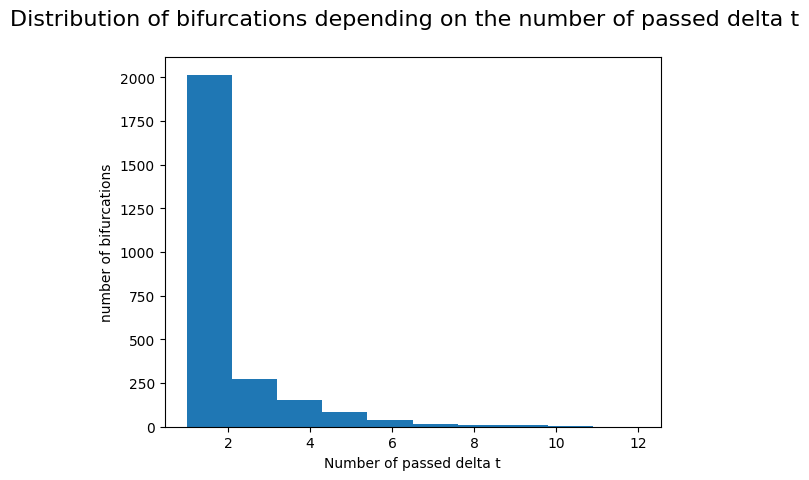

In [ ]:
marked_data = calc_time_between_transitions(x_ts_0)
fig, ax = plt.subplots(1, 1)
fig.suptitle('Distribution of bifurcations depending on the number of passed delta t', fontsize=16)
ax.set_xlabel('Number of passed delta t')
ax.set_ylabel('number of bifurcations')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_locator(MaxNLocator(integer=True, min_n_ticks=1))
ax.hist(marked_data)

## Brown noise

### Graphs of the function and derivative

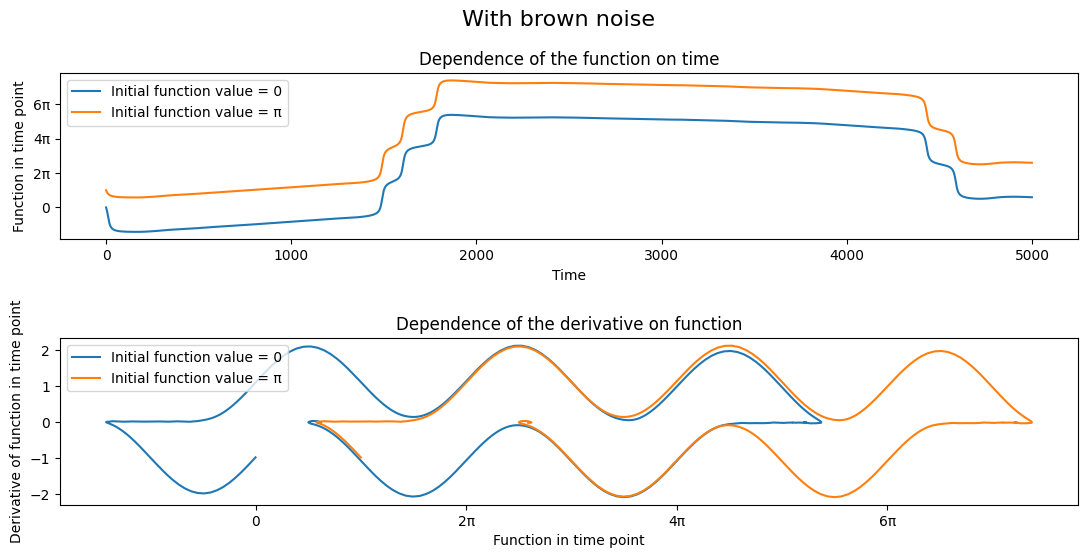

In [ ]:
brown_noise = generate_noise(amplitude=lambda f: 1/f/f)
x_ts_0, d_ts_0 = get_samples(x_t_init = 0, noise=brown_noise)
x_ts_pi, d_ts_pi = get_samples(x_t_init = math.pi, noise=brown_noise)

ax1, ax2 = set_up_plot('With brown noise', figsize=(12, 6), ticks_range=(-10, 20, 2))

ax1.plot(x_ts_0, label='Initial function value = 0')
ax1.plot(x_ts_pi, label='Initial function value = π')
ax1.legend()

ax2.plot(x_ts_0, d_ts_0, label='Initial function value = 0')
ax2.plot(x_ts_pi, d_ts_pi, label='Initial function value = π')
ax2.legend()

(array([9., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([  11. ,  265.7,  520.4,  775.1, 1029.8, 1284.5, 1539.2, 1793.9,
        2048.6, 2303.3, 2558. ]),
 <BarContainer object of 10 artists>)

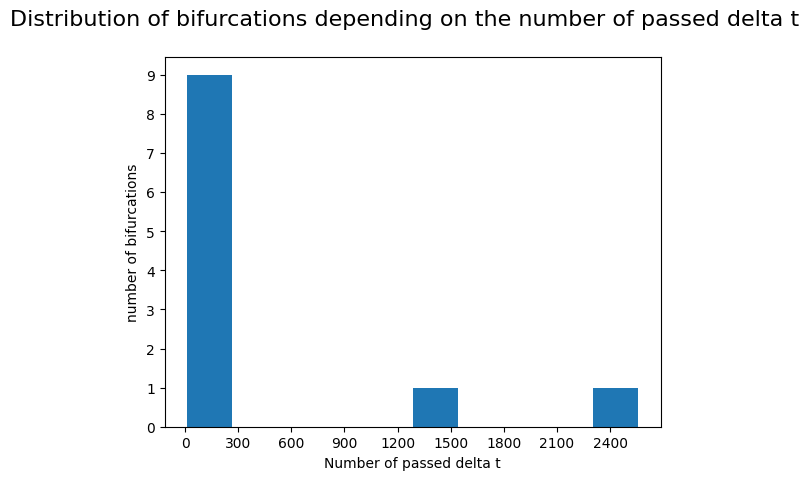

In [ ]:
marked_data = calc_time_between_transitions(x_ts_0)
fig, ax = plt.subplots(1, 1)
fig.suptitle('Distribution of bifurcations depending on the number of passed delta t', fontsize=16)
ax.set_xlabel('Number of passed delta t')
ax.set_ylabel('number of bifurcations')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_locator(MaxNLocator(integer=True, min_n_ticks=1))
ax.hist(marked_data)

### Distribution of transition points on delta t

## Blue noise

### Graphs of the function and derivative

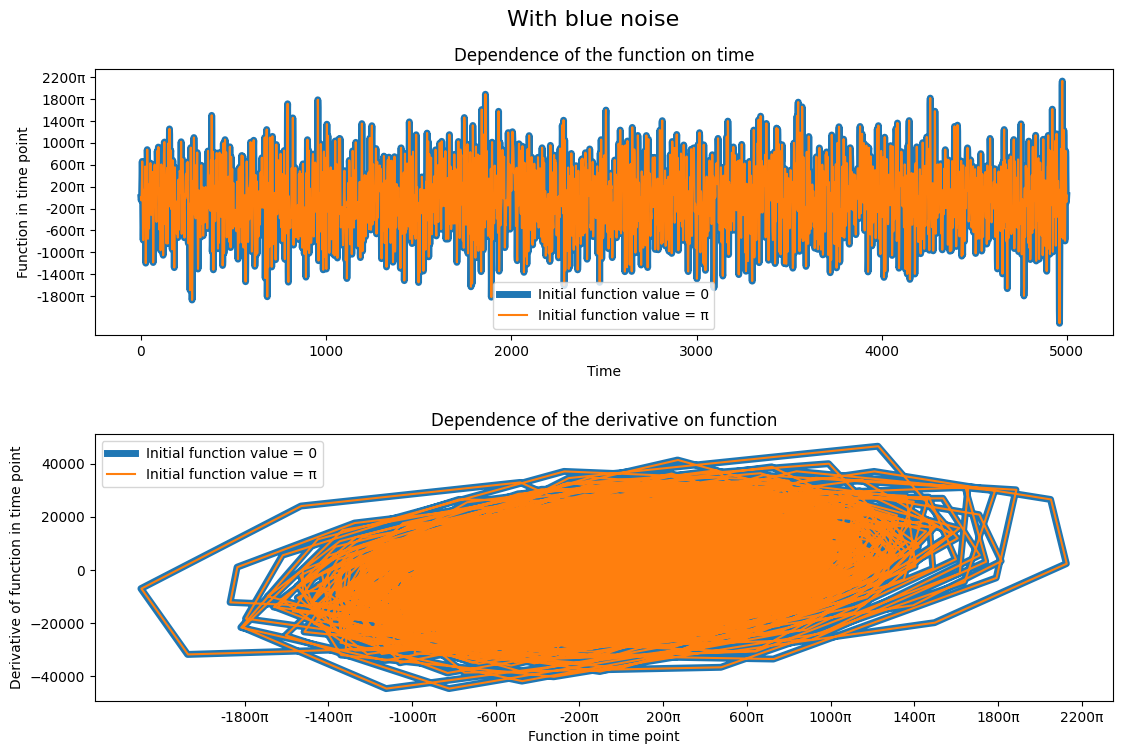

In [ ]:
blue_noise = generate_noise(amplitude=lambda f: f)
x_ts_0, d_ts_0 = get_samples(x_t_init = 0, noise=blue_noise)
x_ts_pi, d_ts_pi = get_samples(x_t_init = math.pi, noise=blue_noise)

ax1, ax2 = set_up_plot('With blue noise', figsize=(12, 8), ticks_range=(-1800, 3000, 400))

ax1.plot(x_ts_0, label='Initial function value = 0', linewidth=5)
ax1.plot(x_ts_pi, label='Initial function value = π')
ax1.legend()

ax2.plot(x_ts_0, d_ts_0, label='Initial function value = 0', linewidth=5)
ax2.plot(x_ts_pi, d_ts_pi, label='Initial function value = π')
ax2.legend()

### Distribution of transition points on delta t

(array([4.991e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

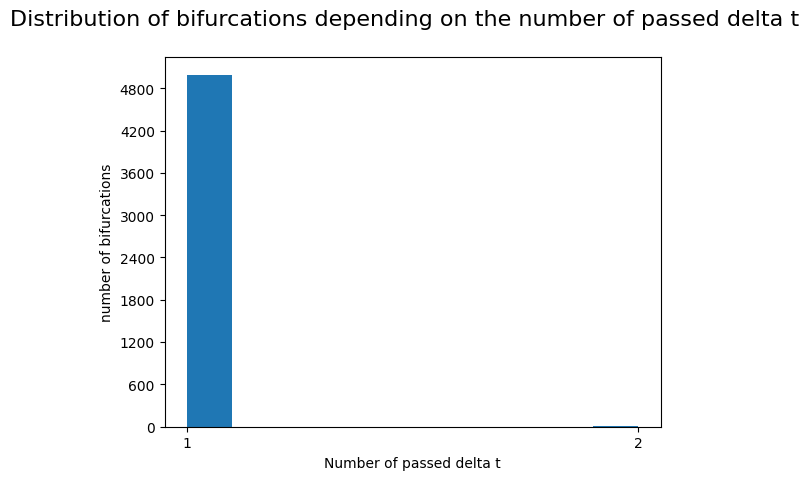

In [ ]:
marked_data = calc_time_between_transitions(x_ts_0)
fig, ax = plt.subplots(1, 1)
fig.suptitle('Distribution of bifurcations depending on the number of passed delta t', fontsize=16)
ax.set_xlabel('Number of passed delta t')
ax.set_ylabel('number of bifurcations')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_locator(MaxNLocator(integer=True, min_n_ticks=1))
ax.hist(marked_data)

## Generate and save series

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# white noise
generate_data()

In [ ]:
# brown noise
generate_data(lambda f: 1/f/f, filename='brown')

In [ ]:
# blue noise
generate_data(lambda f: f, filename='blue')

# Predict bifurcations

In [5]:
chunk_size = 50

In [11]:
x_ts_white = read_series_from_file()

In [19]:
x_ts_brown = read_series_from_file('brown')

In [24]:
x_ts_blue = read_series_from_file('blue')

## Prediction of bifurcation at the next point

In [15]:
one_point_lstm = Sequential([
    Input((chunk_size, 1)),
    LSTM(10),
    Dense(1, activation='sigmoid')
])

one_point_lstm.compile(loss='binary_crossentropy', metrics=['binary_accuracy'], optimizer='adam')

### White noise

In [12]:
print(x_ts_white[:10])
X_white = x_ts_white.reshape(len(x_ts_white), 1)
X_white = np.array([X_white[i:i + chunk_size, :] for i in range(len(X_white) - chunk_size)])

print(x_ts_white.shape)
print(X_white.shape)

[0 0 1 0 0 0 0 1 0 1]
(1000000,)
(999950, 50, 1)


In [13]:
Y_white = x_ts_white[chunk_size:].reshape(X_white.shape[0], 1)
Y_white.shape

(999950, 1)

In [17]:
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(
  X_white[:100_000],
  Y_white[:100_000],
  test_size=0.1,
  train_size=0.9,
  shuffle=False,
)
X_train_white.shape, y_train_white.shape, X_test_white.shape, y_test_white.shape

((90000, 50, 1), (90000, 1), (10000, 50, 1), (10000, 1))

In [18]:
one_point_lstm.fit(X_train_white, y_train_white, batch_size=32, epochs=3, validation_data=(X_test_white, y_test_white))

Epoch 1/3
2813/2813 [==============================] - 74s 26ms/step - loss: 0.6479 - binary_accuracy: 0.6183 - val_loss: 0.6458 - val_binary_accuracy: 0.6214
Epoch 2/3
2813/2813 [==============================] - 69s 24ms/step - loss: 0.6476 - binary_accuracy: 0.6174 - val_loss: 0.6455 - val_binary_accuracy: 0.6191
Epoch 3/3
2813/2813 [==============================] - 68s 24ms/step - loss: 0.6472 - binary_accuracy: 0.6182 - val_loss: 0.6453 - val_binary_accuracy: 0.6199


### Brown noise

In [20]:
print(x_ts_brown[:10])
X_brown = x_ts_brown.reshape(len(x_ts_brown), 1)
X_brown = np.array([X_brown[i:i + chunk_size, :] for i in range(len(X_brown) - chunk_size)])

print(x_ts_brown.shape)
print(X_brown.shape)

[0 0 0 0 0 0 0 0 0 0]
(1000000,)
(999950, 50, 1)


In [21]:
Y_brown = x_ts_brown[chunk_size:].reshape(X_brown.shape[0], 1)
Y_brown.shape

(999950, 1)

In [22]:
X_train_brown, X_test_brown, y_train_brown, y_test_brown = train_test_split(
  X_brown[:100_000],
  Y_brown[:100_000],
  test_size=0.1,
  train_size=0.9,
  shuffle=False,
)
X_train_brown.shape, y_train_brown.shape, X_test_brown.shape, y_test_brown.shape

((90000, 50, 1), (90000, 1), (10000, 50, 1), (10000, 1))

In [23]:
one_point_lstm.fit(X_train_brown, y_train_brown, batch_size=32, epochs=3, validation_data=(X_test_brown, y_test_brown))

Epoch 1/3
2813/2813 [==============================] - 63s 22ms/step - loss: 0.0232 - binary_accuracy: 0.9979 - val_loss: 0.0113 - val_binary_accuracy: 0.9985
Epoch 2/3
2813/2813 [==============================] - 65s 23ms/step - loss: 0.0148 - binary_accuracy: 0.9979 - val_loss: 0.0113 - val_binary_accuracy: 0.9985
Epoch 3/3
2813/2813 [==============================] - 61s 22ms/step - loss: 0.0148 - binary_accuracy: 0.9979 - val_loss: 0.0114 - val_binary_accuracy: 0.9985


### Blue noise

In [25]:
print(x_ts_blue[:10])
X_blue = x_ts_blue.reshape(len(x_ts_blue), 1)
X_blue = np.array([X_blue[i:i + chunk_size, :] for i in range(len(X_blue) - chunk_size)])

print(x_ts_blue.shape)
print(X_blue.shape)

[0 1 1 1 1 1 1 1 1 1]
(1000000,)
(999950, 50, 1)


In [26]:
Y_blue = x_ts_blue[chunk_size:].reshape(X_blue.shape[0], 1)
Y_blue.shape

(999950, 1)

In [27]:
X_train_blue, X_test_blue, y_train_blue, y_test_blue = train_test_split(
  X_blue[:100_000],
  Y_blue[:100_000],
  test_size=0.1,
  train_size=0.9,
  shuffle=False,
)
X_train_blue.shape, y_train_blue.shape, X_test_blue.shape, y_test_blue.shape

((90000, 50, 1), (90000, 1), (10000, 50, 1), (10000, 1))

In [28]:
one_point_lstm.fit(X_train_blue, y_train_blue, batch_size=32, epochs=3, validation_data=(X_test_blue, y_test_blue))

Epoch 1/3
2813/2813 [==============================] - 63s 22ms/step - loss: 0.0153 - binary_accuracy: 0.9974 - val_loss: 0.0087 - val_binary_accuracy: 0.9989
Epoch 2/3
2813/2813 [==============================] - 63s 22ms/step - loss: 0.0094 - binary_accuracy: 0.9988 - val_loss: 0.0086 - val_binary_accuracy: 0.9989
Epoch 3/3
2813/2813 [==============================] - 63s 22ms/step - loss: 0.0094 - binary_accuracy: 0.9988 - val_loss: 0.0086 - val_binary_accuracy: 0.9989


## Prediction of bifurcation at the next two points

In [35]:
two_points_lstm = Sequential([
    Input((chunk_size, 1)),
    LSTM(10),
    Dense(2, activation='sigmoid')
])

two_points_lstm.compile(loss='binary_crossentropy', metrics=['binary_accuracy'], optimizer='adam')

### White noise

In [30]:
print(x_ts_white[:10])
X_white = x_ts_white.reshape(len(x_ts_white), 1)
X_white = np.array([X_white[i:i + chunk_size, :] for i in range(len(X_white) - chunk_size - 1)])

print(x_ts_white.shape)
print(X_white.shape)

[0 0 1 0 0 0 0 1 0 1]
(1000000,)
(999949, 50, 1)


In [31]:
Y_white = np.array([ x_ts_white[i:i + 2] for i in range(chunk_size, len(x_ts_white)-1)])
Y_white.shape, Y_white[:5]

((999949, 2),
 array([[1, 1],
        [1, 0],
        [0, 1],
        [1, 1],
        [1, 0]]))

In [32]:
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(
  X_white[:100_000],
  Y_white[:100_000],
  test_size=0.1,
  train_size=0.9,
  shuffle=False,
)
X_train_white.shape, y_train_white.shape, X_test_white.shape, y_test_white.shape

((90000, 50, 1), (90000, 2), (10000, 50, 1), (10000, 2))

In [36]:
two_points_lstm.fit(X_train_white, y_train_white, batch_size=32, epochs=3, validation_data=(X_test_white, y_test_white))

Epoch 1/3
2813/2813 [==============================] - 70s 24ms/step - loss: 0.6625 - binary_accuracy: 0.6032 - val_loss: 0.6566 - val_binary_accuracy: 0.6155
Epoch 2/3
2813/2813 [==============================] - 71s 25ms/step - loss: 0.6542 - binary_accuracy: 0.6158 - val_loss: 0.6548 - val_binary_accuracy: 0.6137
Epoch 3/3
2813/2813 [==============================] - 63s 22ms/step - loss: 0.6523 - binary_accuracy: 0.6165 - val_loss: 0.6532 - val_binary_accuracy: 0.6170


### Brown noise

In [37]:
print(x_ts_brown[:10])
X_brown = x_ts_brown.reshape(len(x_ts_brown), 1)
X_brown = np.array([X_brown[i:i + chunk_size, :] for i in range(len(X_brown) - chunk_size - 1)])

print(x_ts_brown.shape)
print(X_brown.shape)

[0 0 0 0 0 0 0 0 0 0]
(1000000,)
(999949, 50, 1)


In [40]:
Y_brown = np.array([ x_ts_brown[i:i + 2] for i in range(chunk_size, len(x_ts_brown)-1)])
Y_brown.shape, Y_brown[:5]

((999949, 2),
 array([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0]]))

In [41]:
X_train_brown, X_test_brown, y_train_brown, y_test_brown = train_test_split(
  X_brown[:100_000],
  Y_brown[:100_000],
  test_size=0.1,
  train_size=0.9,
  shuffle=False,
)
X_train_brown.shape, y_train_brown.shape, X_test_brown.shape, y_test_brown.shape

((90000, 50, 1), (90000, 2), (10000, 50, 1), (10000, 2))

In [42]:
two_points_lstm.fit(X_train_brown, y_train_brown, batch_size=32, epochs=3, validation_data=(X_test_brown, y_test_brown))

Epoch 1/3
2813/2813 [==============================] - 62s 22ms/step - loss: 0.0239 - binary_accuracy: 0.9980 - val_loss: 0.0145 - val_binary_accuracy: 0.9980
Epoch 2/3
2813/2813 [==============================] - 62s 22ms/step - loss: 0.0144 - binary_accuracy: 0.9980 - val_loss: 0.0144 - val_binary_accuracy: 0.9980
Epoch 3/3
2813/2813 [==============================] - 63s 22ms/step - loss: 0.0145 - binary_accuracy: 0.9980 - val_loss: 0.0144 - val_binary_accuracy: 0.9980


### Blue noise

In [43]:
print(x_ts_blue[:10])
X_blue = x_ts_blue.reshape(len(x_ts_blue), 1)
X_blue = np.array([X_blue[i:i + chunk_size, :] for i in range(len(X_blue) - chunk_size - 1)])

print(x_ts_blue.shape)
print(X_blue.shape)

[0 1 1 1 1 1 1 1 1 1]
(1000000,)
(999949, 50, 1)


In [44]:
Y_blue = np.array([ x_ts_blue[i:i + 2] for i in range(chunk_size, len(x_ts_blue)-1)])
Y_blue.shape, Y_blue[:5]

((999949, 2),
 array([[1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1]]))

In [45]:
X_train_blue, X_test_blue, y_train_blue, y_test_blue = train_test_split(
  X_blue[:100_000],
  Y_blue[:100_000],
  test_size=0.1,
  train_size=0.9,
  shuffle=False,
)
X_train_blue.shape, y_train_blue.shape, X_test_blue.shape, y_test_blue.shape

((90000, 50, 1), (90000, 2), (10000, 50, 1), (10000, 2))

In [46]:
two_points_lstm.fit(X_train_blue, y_train_blue, batch_size=32, epochs=3, validation_data=(X_test_blue, y_test_blue))

Epoch 1/3
2813/2813 [==============================] - 64s 23ms/step - loss: 0.0197 - binary_accuracy: 0.9964 - val_loss: 0.0093 - val_binary_accuracy: 0.9988
Epoch 2/3
2813/2813 [==============================] - 65s 23ms/step - loss: 0.0093 - binary_accuracy: 0.9988 - val_loss: 0.0092 - val_binary_accuracy: 0.9988
Epoch 3/3
2813/2813 [==============================] - 64s 23ms/step - loss: 0.0092 - binary_accuracy: 0.9988 - val_loss: 0.0091 - val_binary_accuracy: 0.9988


## Prediction of bifurcation at the next five points

In [47]:
five_points_lstm = Sequential([
    Input((chunk_size, 1)),
    LSTM(10),
    Dense(5, activation='sigmoid')
])

five_points_lstm.compile(loss='binary_crossentropy', metrics=['binary_accuracy'], optimizer='adam')

### White noise

In [48]:
print(x_ts_white[:10])
X_white = x_ts_white.reshape(len(x_ts_white), 1)
X_white = np.array([X_white[i:i + chunk_size, :] for i in range(len(X_white) - chunk_size - 4)])

print(x_ts_white.shape)
print(X_white.shape)

[0 0 1 0 0 0 0 1 0 1]
(1000000,)
(999946, 50, 1)


In [49]:
Y_white = np.array([ x_ts_white[i:i + 5] for i in range(chunk_size, len(x_ts_white)-4)])
Y_white.shape, Y_white[:5]

((999946, 5),
 array([[1, 1, 0, 1, 1],
        [1, 0, 1, 1, 0],
        [0, 1, 1, 0, 1],
        [1, 1, 0, 1, 1],
        [1, 0, 1, 1, 1]]))

In [50]:
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(
  X_white[:100_000],
  Y_white[:100_000],
  test_size=0.1,
  train_size=0.9,
  shuffle=False,
)
X_train_white.shape, y_train_white.shape, X_test_white.shape, y_test_white.shape

((90000, 50, 1), (90000, 5), (10000, 50, 1), (10000, 5))

In [51]:
five_points_lstm.fit(X_train_white, y_train_white, batch_size=32, epochs=3, validation_data=(X_test_white, y_test_white))

Epoch 1/3
2813/2813 [==============================] - 69s 24ms/step - loss: 0.6825 - binary_accuracy: 0.5491 - val_loss: 0.6772 - val_binary_accuracy: 0.5610
Epoch 2/3
2813/2813 [==============================] - 66s 23ms/step - loss: 0.6761 - binary_accuracy: 0.5624 - val_loss: 0.6753 - val_binary_accuracy: 0.5633
Epoch 3/3
2813/2813 [==============================] - 67s 24ms/step - loss: 0.6749 - binary_accuracy: 0.5639 - val_loss: 0.6744 - val_binary_accuracy: 0.5657


### Brown noise

In [52]:
print(x_ts_brown[:10])
X_brown = x_ts_brown.reshape(len(x_ts_brown), 1)
X_brown = np.array([X_brown[i:i + chunk_size, :] for i in range(len(X_brown) - chunk_size - 4)])

print(x_ts_brown.shape)
print(X_brown.shape)

[0 0 0 0 0 0 0 0 0 0]
(1000000,)
(999946, 50, 1)


In [53]:
Y_brown = np.array([ x_ts_brown[i:i + 5] for i in range(chunk_size, len(x_ts_brown)-4)])
Y_brown.shape, Y_brown[:5]

((999946, 5),
 array([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]]))

In [54]:
X_train_brown, X_test_brown, y_train_brown, y_test_brown = train_test_split(
  X_brown[:100_000],
  Y_brown[:100_000],
  test_size=0.1,
  train_size=0.9,
  shuffle=False,
)
X_train_brown.shape, y_train_brown.shape, X_test_brown.shape, y_test_brown.shape

((90000, 50, 1), (90000, 5), (10000, 50, 1), (10000, 5))

In [55]:
five_points_lstm.fit(X_train_brown, y_train_brown, batch_size=32, epochs=3, validation_data=(X_test_brown, y_test_brown))

Epoch 1/3
2813/2813 [==============================] - 62s 22ms/step - loss: 0.0267 - binary_accuracy: 0.9967 - val_loss: 0.0144 - val_binary_accuracy: 0.9980
Epoch 2/3
2813/2813 [==============================] - 63s 22ms/step - loss: 0.0144 - binary_accuracy: 0.9980 - val_loss: 0.0144 - val_binary_accuracy: 0.9980
Epoch 3/3
2813/2813 [==============================] - 63s 22ms/step - loss: 0.0145 - binary_accuracy: 0.9980 - val_loss: 0.0144 - val_binary_accuracy: 0.9980


### Blue noise

In [56]:
print(x_ts_blue[:10])
X_blue = x_ts_blue.reshape(len(x_ts_blue), 1)
X_blue = np.array([X_blue[i:i + chunk_size, :] for i in range(len(X_blue) - chunk_size - 4)])

print(x_ts_blue.shape)
print(X_blue.shape)

[0 1 1 1 1 1 1 1 1 1]
(1000000,)
(999946, 50, 1)


In [57]:
Y_blue = np.array([ x_ts_blue[i:i + 5] for i in range(chunk_size, len(x_ts_blue)-4)])
Y_blue.shape, Y_blue[:5]

((999946, 5),
 array([[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]]))

In [58]:
X_train_blue, X_test_blue, y_train_blue, y_test_blue = train_test_split(
  X_blue[:100_000],
  Y_blue[:100_000],
  test_size=0.1,
  train_size=0.9,
  shuffle=False,
)
X_train_blue.shape, y_train_blue.shape, X_test_blue.shape, y_test_blue.shape

((90000, 50, 1), (90000, 5), (10000, 50, 1), (10000, 5))

In [59]:
five_points_lstm.fit(X_train_blue, y_train_blue, batch_size=32, epochs=3, validation_data=(X_test_blue, y_test_blue))

Epoch 1/3
2813/2813 [==============================] - 67s 24ms/step - loss: 0.0446 - binary_accuracy: 0.9942 - val_loss: 0.0096 - val_binary_accuracy: 0.9988
Epoch 2/3
2813/2813 [==============================] - 66s 23ms/step - loss: 0.0094 - binary_accuracy: 0.9988 - val_loss: 0.0093 - val_binary_accuracy: 0.9988
Epoch 3/3
2813/2813 [==============================] - 63s 22ms/step - loss: 0.0093 - binary_accuracy: 0.9988 - val_loss: 0.0093 - val_binary_accuracy: 0.9988
